<a href="https://colab.research.google.com/github/aramirezfr/Facial-Recognition-with-Deep-Learning-Neural-Networks/blob/master/Facial_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding:

### **About the Project:**  
This project focuses on developing a binary image classifier capable of distinguishing between human faces and non-face objects with high accuracy. The classifier will leverage advanced machine learning techniques to ensure reliable and efficient performance. The primary aim is to create a robust model that can be integrated into real-world applications such as smart surveillance systems, biometric authentication, and automated monitoring. By experimenting with various approaches, the project seeks to optimize performance and address the challenges associated with false positives and false negatives in face-object detection.

### **Why is This Problem Important to Solve?**  
In today's increasingly connected world, effective security and surveillance systems are critical for public safety and operational efficiency. Misidentifying faces as objects, or vice versa, can lead to inefficiencies, security risks, and missed opportunities for accurate monitoring. For instance, detecting unattended objects as potential threats or ensuring only authorized individuals access secure areas are vital for safety and operational integrity. Solving this problem enables smarter surveillance, reduces manual oversight, and enhances the accuracy of systems that rely on distinguishing human presence from inanimate objects. This has far-reaching implications for public safety, privacy, and the advancement of AI-driven security technologies.

### Benefits of Implementing Face Detection for Surveillance Systems  

1. **Enhanced Security**: Face detection allows surveillance systems to identify individuals in real time, helping to detect unauthorized access, locate persons of interest, and respond to security threats promptly.  

2. **Improved Efficiency**: Automating face detection reduces the need for continuous human monitoring, allowing security personnel to focus on critical events and reducing operational costs.  

3. **Threat Identification**: The system can distinguish human faces from unattended objects, such as bags or packages, enabling faster detection of potential security risks like abandoned luggage in crowded spaces.  

4. **Seamless Access Control**: Face detection systems can be integrated into biometric authentication systems to grant access only to authorized individuals, enhancing security in restricted areas.  

5. **Real-Time Analytics**: Face detection provides valuable data for real-time analytics, such as crowd density, movement patterns, and unusual activities, enabling smarter decision-making.  

6. **Scalability and Versatility**: These systems can be deployed across various environments, from airports and shopping malls to corporate offices and schools, offering scalable solutions for diverse security needs.  

7. **Privacy-Conscious Monitoring**: Advanced algorithms can focus on detecting faces without storing unnecessary personal data, ensuring compliance with privacy regulations while maintaining security.  

8. **Reduction in False Alarms**: By accurately distinguishing between faces and non-relevant objects, face detection systems reduce the occurrence of false alarms, leading to more efficient operations.  

By implementing face detection in surveillance systems, organizations can enhance public safety, improve operational efficiency, and foster trust in the reliability of security technologies.

## Data Understanding:

#### **Source and Properties of the data:**  
- **Tiny ImageNet Dataset**: This dataset contains a subset of the ImageNet dataset and includes 200 classes, with images of size 64x64 pixels. It is suitable for this project because it provides a diverse collection of object images that represent non-face entities. This diversity is critical to training a robust model that can reliably distinguish objects from faces in various scenarios.  
- **Labeled Faces in the Wild (LFW) Dataset**: This dataset contains 13,000 images of faces collected from the web, designed for face recognition tasks. It is highly suitable for this project as it provides a large number of labeled face images, enabling the model to learn distinct facial features and patterns.  

By combining these datasets, the project ensures a balanced representation of both classes (faces and objects), which is essential for building a reliable binary classifier.

**Size and descriptive Statistic Features:**  
- **Tiny ImageNet Dataset**: Contains 100,000 training images and 10,000 validation images. Images are RGB and resized to 64x64 pixels. The image size is around 1.5K.
- **LFW Dataset**: Contains over 13,000 images of faces, with varying lighting conditions, orientations, and resolutions. The image size is around 8K.

**Descriptive Statistics**:  
- **Features**: RGB pixel intensities (3 channels), normalized for preprocessing.  
- **Class Balance**: Steps will be taken to ensure equal representation of faces and objects during training to avoid bias in the model.  

**Feature Suitability:**  
The Pixel Intensities (RGB) feature capture the raw visual information required to distinguish between faces and objects.  
This Binary classification model requires clear distinctions between "face" and "object" classes, which these datasets provide through their labeling. The data variety in lighting, orientation, and object types ensures the model generalizes well to real-world scenarios, where inputs may vary significantly.  

**Limitations of using this data:**  
- The images in both datasets have relatively **low resolutions**. While this helps with computational efficiency, it might limit the model’s ability to detect fine details, potentially affecting accuracy.  
- The Tiny ImageNet dataset is significantly larger than the LFW dataset, which could introduce **class imbalance**. To mitigate this, undersampling of the object class or oversampling of the face class may be required.  

By addressing these tasks and accounting for the limitations, the project will effectively leverage the strengths of these datasets to build a high-performing face vs. object classifier.


For further details, refer to the Kaggle dataset page: (https://www.kaggle.com/datasets/jessicali9530/lfw-dataset) and (https://www.kaggle.com/datasets/akash2sharma/tiny-imagenet/data)

# Data Preparation:

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import seaborn as sns
import math
from PIL import Image
import matplotlib.image as mpimg
from scipy.stats import randint

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

---------------------------------------

## Face Dataset:

I will be using the face dataset to train my model. I need to set the face dataset as the positive outcome of the model.
I will also use the object dataset as the negative outcome.

In [2]:
#Downloading the data file from Kaggle
#!kaggle datasets download -d jessicali9530/lfw-dataset #uncomment to run

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset
License(s): other
 81% 91.0M/112M [00:00<00:00, 127MB/s]
100% 112M/112M [00:00<00:00, 144MB/s] 


In [4]:
#Unzip the data folder
#!unzip lfw-dataset.zip -d data #uncomment before running

In [5]:
#define the root directory you want to start from
face_root_dir = 'data/lfw-deepfunneled/lfw-deepfunneled/'

#list to store all jpeg file paths
face_jpg_files = []

#walk the directory tree
for dirpath, dirnames, files in os.walk(face_root_dir):
    for file in files:
        #check if the file ends with .jpg
        if file.endswith('.jpg'):
            #construct the full file path
            full_path = os.path.join(dirpath, file)
            #append to the list
            face_jpg_files.append(full_path)

I will begin downloading the necessary files from Kaggle, unzip both files needed and Importing the necessary libraries for this project.

In [6]:
len(face_jpg_files)

13233

-------------

## Objects Dataset:

In [8]:
# Downloading the data file from Kaggle of the objects
!kaggle datasets download -d akash2sharma/tiny-imagenet #uncomment before running

Dataset URL: https://www.kaggle.com/datasets/akash2sharma/tiny-imagenet
License(s): unknown
 99% 468M/474M [00:02<00:00, 265MB/s]
100% 474M/474M [00:02<00:00, 210MB/s]


In [10]:
#unzip the data folder
!unzip tiny-imagenet.zip -d data #uncomment to run

Streaming output truncated to the last 5000 lines.
  inflating: data/tiny-imagenet-200/val/images/val_5500.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5501.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5502.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5503.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5504.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5505.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5506.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5507.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5508.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5509.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_551.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5510.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5511.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5512.JPEG  
  inflating: data/tiny-imagenet-200/val/images/val_5513.JPEG  
  inf

In [11]:
object_root_dir = 'data/tiny-imagenet-200/'
object_jpg_files = []

#walk the tiny objects directory tree
for dirpath, dirnames, files in os.walk(object_root_dir):
    for file in files:
        #check if the file ends with .JPEG
        if file.endswith('.JPEG'):
            #construct the full file path
            full_path = os.path.join(dirpath, file)
            #append to the list
            object_jpg_files.append(full_path)

In [12]:
len(object_jpg_files)

240000

In [13]:
import shutil
shutil.rmtree('data/tiny-imagenet-200/tiny-imagenet-200', ignore_errors=True)

In [14]:
object_root_dir = 'data/tiny-imagenet-200/'
object_jpg_files = []

#walk the tiny objects directory tree
for dirpath, dirnames, files in os.walk(object_root_dir):
    for file in files:
        #check if the file ends with .JPEG
        if file.endswith('.JPEG'):
            #construct the full file path
            full_path = os.path.join(dirpath, file)
            #append to the list
            object_jpg_files.append(full_path)

In [15]:
len(object_jpg_files)

120000

There are 120,000 files in the dataset, that is about 10 times more than the faces dataset. I will use a random sample of 12,000 images of objects so the data gets more balanced.

In [16]:
import random
random.seed(42)

#randomly sample 12,000 images from the path
tinyobject_jpg_files = random.sample(object_jpg_files, 12000)

#verify the length of the reduced list
print(f"Number of object images selected: {len(tinyobject_jpg_files)}")

Number of object images selected: 12000


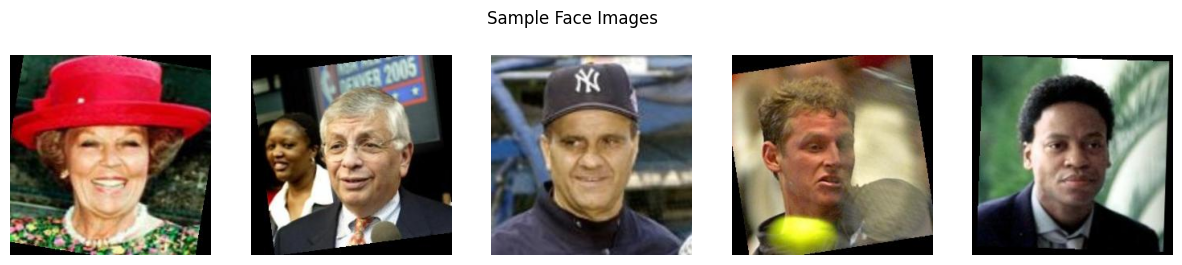

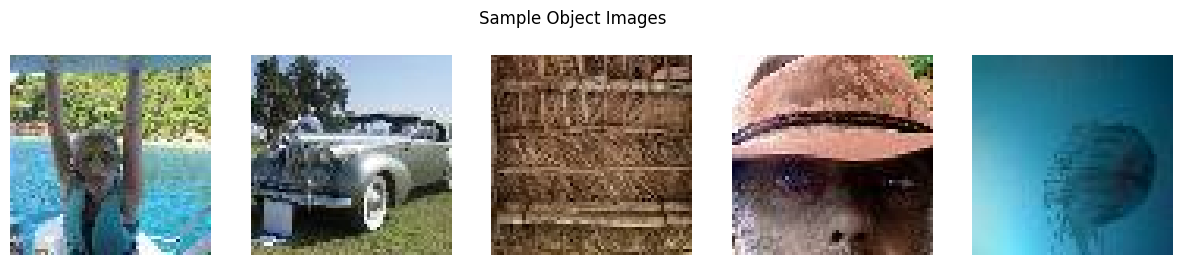

In [17]:
#display images from objects and faces dataset
#randomly select images from each category
num_samples = 5
random.seed(42)
sample_face_images = random.sample(face_jpg_files, num_samples)
sample_tinyobject_images = random.sample(tinyobject_jpg_files, num_samples)

#function to display images
from PIL import Image
def display_images(image_paths, title):
    plt.figure(figsize=(15, 3))
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

#display face images
display_images(sample_face_images, "Sample Face Images")

#display object images
display_images(sample_tinyobject_images, "Sample Object Images")

------------------------

## Split:

In [18]:
#function to load and preprocess images
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0  #normalize to [0,1]
    return image, label

#batch size
batch_size = 32

In [19]:
#creating labels for each set
face_labels = [1] * len(face_jpg_files)  #positive class for faces
tinyobject_labels = [0] * len(tinyobject_jpg_files)  #negative class for objects

#combine lists and labels
all_images = face_jpg_files + tinyobject_jpg_files
all_labels = face_labels + tinyobject_labels

In [20]:
#convert to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [21]:
#convert to TensorFlow Dataset
images_ds = tf.data.Dataset.from_tensor_slices(all_images)
labels_ds = tf.data.Dataset.from_tensor_slices(all_labels)
dataset = tf.data.Dataset.zip((images_ds, labels_ds))

In [22]:
#define the target image size
img_height = 128
img_width = 128

In [23]:
#apply the preprocessing function
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

#prepare for training
dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

Splitting the data two times.\
**First split:** will separate the data into training data(0.70) and temporary data (0.30).\
**Second split:** separates the temporary data into validation(0.15) and testing (0.15).

In [24]:
from sklearn.model_selection import train_test_split
#first split
X_train, X_temp, y_train, y_temp = train_test_split(
    all_images, all_labels, test_size=0.3, random_state=42, stratify=all_labels
)
#second split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

**Resulting proportions:**
- X_train: 70% of the total data
- X_val: 15% of the total data
- X_test: 15% of the total data

In [25]:
print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")

Training set: 17663 images
Validation set: 3785 images
Test set: 3785 images


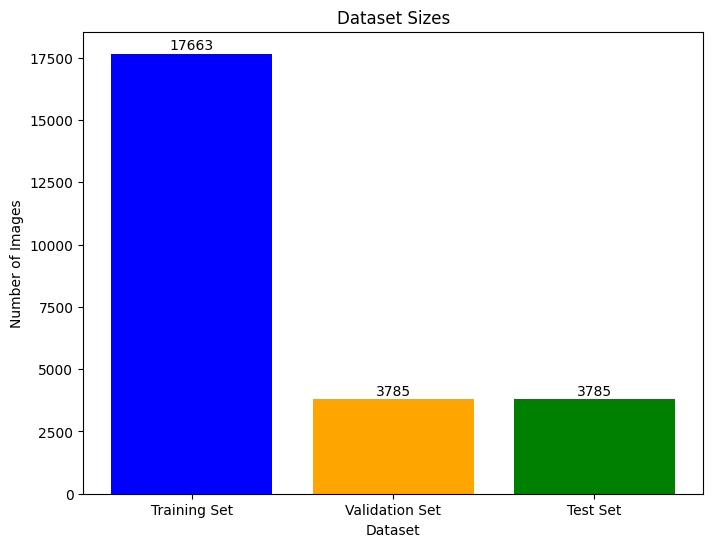

In [26]:
#sizes of each dataset
train_size = len(X_train)
val_size = len(X_val)
test_size = len(X_test)

#labels and sizes
categories = ['Training Set', 'Validation Set', 'Test Set']
sizes = [train_size, val_size, test_size]

#plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, sizes, color=['blue', 'orange', 'green'])
plt.title('Dataset Sizes')
plt.xlabel('Dataset')
plt.ylabel('Number of Images')

#display the values on top of the bars
for i, size in enumerate(sizes):
    plt.text(i, size + max(sizes) * 0.01, str(size), ha='center')
plt.show()

In [27]:
#creating a TensorFlow Dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

#create validation and test datasets
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
#function to set up datasets for the decision tree and random forest
def load_and_preprocess_image_dt(path):
    """Loads and preprocesses a single image."""
    image = Image.open(path).convert('RGB') # Convert to RGB if not already
    image = image.resize((64, 64))  # Resize to match your desired input size
    image = np.array(image) / 255.0  # Normalize to [0,1]
    return image.flatten()  # Flatten the image into a 1D array

#preprocess the training data
X_train_processed_dt = np.array([load_and_preprocess_image_dt(path) for path in X_train])

#preprocess the validation data
X_val_processed_dt = np.array([load_and_preprocess_image_dt(path) for path in X_val])

#preprocess test data
X_test_processed_dt = np.array([load_and_preprocess_image_dt(path) for path in X_test])

# Model:

**Model building** is an iterative process that begins with developing a baseline model, which serves as a reference point for comparison. Each subsequent model iteration will be designed with clear justifications based on the performance of previous models. \
- By systematically refining and evaluating these iterations, the goal is to identify the model that delivers the best performance for this binary classification task.

## Model with Simple decision trees and random forest:

In [29]:
#Simple Decision Tree
dt_classifier = DecisionTreeClassifier() #instantiate
dt_classifier.fit(X_train_processed_dt, y_train) #fit
dt_val_predictions = dt_classifier.predict(X_val_processed_dt) #predictions

#calculate accuracy
dt_accuracy = accuracy_score(y_val, dt_val_predictions)
print(f"Decision Tree Validation Accuracy: {dt_accuracy}")

Decision Tree Validation Accuracy: 0.9606340819022458


In [32]:
#Simple Random Forest
rf_classifier = RandomForestClassifier() #instantiate
rf_classifier.fit(X_train_processed_dt, y_train) #fit
rf_val_predictions = rf_classifier.predict(X_val_processed_dt) #predictions
rf_accuracy = accuracy_score(y_val, rf_val_predictions) #get acc score
print(f"Random Forest Validation Accuracy: {rf_accuracy}")

Random Forest Validation Accuracy: 0.9889035667107001


----------------------------

## Model with Hyperparameter Tuning on Random Forest:

In [ ]:
#parameter distribution
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1, 20)}

rf_classifier = RandomForestClassifier() #instantiate

rand_search = RandomizedSearchCV(rf_classifier,
                                   param_distributions=param_dist,
                                   cv=5, #cross-validation folds
                                   n_iter=5,  #iterations
                                   scoring='accuracy')

#fit the model using the processed training data
rand_search.fit(X_train_processed, y_train)

#predictions on the validation set (using processed data)
rf_val_predictions = rand_search.predict(X_val_processed)

In [ ]:
#variable for the best model
best_rf = rand_search.best_estimator_

#print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 318}


In [ ]:
#create a new RandomForestClassifier with the best hyperparameters
optimal_rf = RandomForestClassifier(max_depth=13,
                                    n_estimators=318,
                                    )

optimal_rf.fit(X_train_processed, y_train)#fit

predictions = optimal_rf.predict(X_val_processed)

In [ ]:
 # Now predict using the processed data
y_pred = optimal_rf.predict(X_test_processed)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9912813738441215


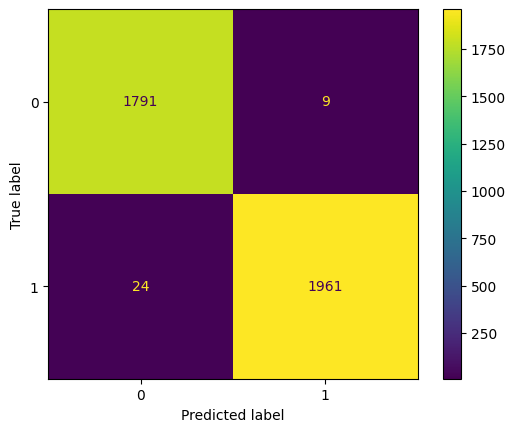

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
#scores gotten from random forest classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9912813738441215
Precision: 0.9954314720812183
Recall: 0.9879093198992444


## Baseline Model:

In [ ]:
#define a simple CNN model
base_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#compile the model
base_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
base_model_hist=base_model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 548s 980ms/step - accuracy: 0.9325 - loss: 0.2020 - val_accuracy: 0.9952 - val_loss: 0.0165
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 528s 924ms/step - accuracy: 0.9956 - loss: 0.0108 - val_accuracy: 0.9934 - val_loss: 0.0207
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 578s 954ms/step - accuracy: 0.9978 - loss: 0.0054 - val_accuracy: 0.9942 - val_loss: 0.0205
Epoch 4/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 492s 889ms/step - accuracy: 0.9944 - loss: 0.0153 - val_accuracy: 0.9923 - val_loss: 0.0268
Epoch 5/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 499s 886ms/step - accuracy: 0.9977 - loss: 0.0055 - val_accuracy: 0.9976 - val_loss: 0.0063
Epoch 6/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 494s 894ms/step - accuracy: 0.9993 - loss: 0.0016 - val_accuracy: 0.9989 - val_loss: 0.0061
Epoch 7/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 507s 903ms/step - accuracy: 1.0000 - loss: 1.3262e-04 - val_accuracy: 0.9976 - val_loss: 0.0098
Epoch 8/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 495s 890ms/step - accuracy: 1.00

In [ ]:
# Evaluate the model
results_base_train=base_model.evaluate(test_dataset)

119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.9989 - loss: 0.0040


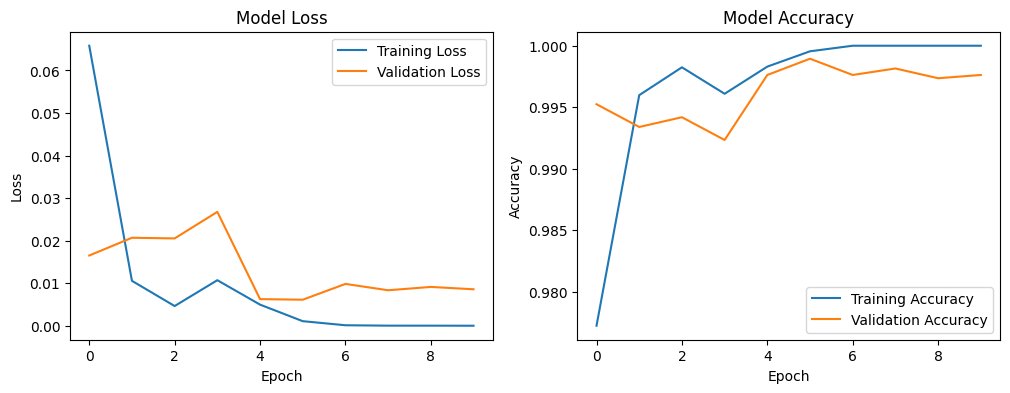

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(base_model_hist.history['loss'], label='Training Loss')
plt.plot(base_model_hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(base_model_hist.history['accuracy'], label='Training Accuracy')
plt.plot(base_model_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Hyperparameter tuning on the CNN:

In [ ]:
from kerastuner import RandomSearch

def build_model(hp):
    model = tf.keras.Sequential()

    # Convolutional Layers
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        input_shape=(img_height, img_width, 3)
    ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu'
    ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Fully Connected Layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the Model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='image_classifier_tuning'
)

In [30]:
# Extract images and labels from the TensorFlow datasets
X_train_images, y_train_labels = tuple(zip(*train_dataset))
X_val_images, y_val_labels = tuple(zip(*val_dataset))

# Convert to NumPy arrays
X_train_images = np.concatenate(list(X_train_images))
y_train_labels = np.concatenate(list(y_train_labels))
X_val_images = np.concatenate(list(X_val_images))
y_val_labels = np.concatenate(list(y_val_labels))

# Perform hyperparameter tuning with the tuner object
#tuner.search(X_train_images, y_train_labels, epochs=10, validation_data=(X_val_images, y_val_labels))

In [32]:
pip install -q -U keras-tuner #uncomment if you need to install kerastuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
from kerastuner import RandomSearch

# Define a function to build your model with hyperparameters
def build_model(hp):
    model = tf.keras.Sequential()

    # First Convolutional Layer
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        input_shape=(img_height, img_width, 3)
    ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu'
    ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Flatten Layer
    model.add(tf.keras.layers.Flatten())

    # Fully Connected (Dense) Layer
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))

    # Dropout Layer for Regularization
    model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the Model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Set up the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='image_classifier_tuning'
)

# Run the hyperparameter search
# Assume you have your data prepared as train_images, train_labels, val_images, val_labels
tuner.search(X_train_images, y_train_labels, epochs=10, validation_data=(X_val_images, y_val_labels))

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 1 Complete [03h 23m 30s]
val_accuracy: 0.9990312655766805

Best val_accuracy So Far: 0.9990312655766805
Total elapsed time: 03h 23m 30s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
64                |96                |filters_1
5                 |3                 |kernel_size_1
192               |128               |filters_2
5                 |3                 |kernel_size_2
64                |64                |dense_units
0.2               |0.3               |dropout_rate
0.0013775         |0.0023217         |learning_rate

Epoch 1/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 714s 1s/step - accuracy: 0.9144 - loss: 0.3079 - val_accuracy: 0.9945 - val_loss: 0.0176
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.9938 - loss: 0.0202 - val_accuracy: 0.9968 - val_loss: 0.0110
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 708s 1s/step - accuracy: 0.9933 - loss: 0.0317 - val_accuracy: 0.9905 - val_loss: 0.0307
Epoch 4/10
552/552 ━━━━━━━━━━━━━━━━━━